# Introduction 

This IPython notebook intended to reproduce the results, plots and other reform analysis presented in Alex Brill's paper, "Understanding Proposed Middle-Class Tax Cuts", when 2009 public use file is available. Detailed documentation and proper explanations were also included for readers to better understand the code.

In [1]:
# This Cell loaded all the pacakges needed for calculation
# and plotting. As an exemplification, matplotlib provides
# us with various options of visualization. 
import sys
sys.path.append("../../")
from taxcalc import *
import pandas as pd
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.transforms import BlendedGenericTransform
%matplotlib inline

Note that the 'taxcalc', an incubated tool developed by the Open Source Policy Center, offers non-standard tax-related functionality beyond ritual importations. More information regarding 'taxcalc' tool to be found [here](https://github.com/open-source-economics/Tax-Calculator/blob/master/README.md).

In [2]:
# This cell defines a set operation that avoids potential data
# structual error.
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
# This cell defines 6 experiments that will be used later. Each 
# Records() statement reads the input; each Policy() statement 
# determines the parameters; while each Behavior() statement
# records the default behavior.

# This is the baseline we defined.
records_baseline = Records("../../puf.csv")
params_baseline = Policy()


# Parallel experiment x. 
records_x = Records("../../puf.csv")
params_x = Policy()
behavior_x = Behavior()

# Parallel experiment y std. 
records_y_std = Records("../../puf.csv")
params_y_std = Policy()
behavior_std = Behavior()

# Parallel experiment y rates. 
records_y_rates = Records("../../puf.csv")
params_y_rates = Policy()
behavior_rates = Behavior()

# Parallel experiment y rates low. 
records_y_rates_low = Records("../../puf.csv")
params_y_rates_low = Policy()
behavior_rates_low = Behavior()

# Parallel experiment y rates high. 
records_y_rates_high = Records("../../puf.csv")
params_y_rates_high = Policy()
behavior_rates_high = Behavior()

Remark: Notice that, at this point, all the experiments are indifferent. 

## Implement Reforms

When implementing reforms, one should notice the data structure of the parameter(s) to avoid possbile errors. Specifying the year of the reform would also be helpful.

In [4]:
# This is the actual 'base-line' we are using that suppresses AMT. 
# Default rate: '_AMT_trt1': [.26], '_AMT_trt2': [.02]
reform_x = {
    2016: {
            '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
    },
}

# This is the reform that doubles the standard deduction amount,
# on top of the 'base-line' that suppresses AMT. 
reform_std = {
    2016: {
            '_STD': [[12600, 25200, 12600, 18600, 25300, 12600, 2100]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
           },}


# This is the reform that lifts the second income tax bracket threshold,
# on top of the 'base-line' that suppresses AMT. 
# Default value: [37650, 75300, 37650, 50400, 75300, 37650]
reform_rates = {
    2016: {
            '_II_brk2': [[65005, 130010, 65005, 88180, 130010, 65005]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
       }, }

# This is the reform that lifts the first income tax bracket threshold,
# on top of the 'base-line' that suppresses AMT. 
# Default value: [9275, 18550, 9275, 13250, 18550, 9275]
reform_rates_low = {
    2016: {
           '_II_brk1': [[27825, 55650, 27825, 39750, 55650, 27825]],
           '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
       }, }

# This is the reform that unifies the last three tax rates, 
# on top of the 'base-line' that suppresses AMT. 
# Default value:'_II_rt5': [0.33], 
#               '_II_rt6': [0.35], 
#               '_II_rt7': [0.396].
reform_rates_high = {
    2016: {
            '_II_rt5': [.2875],
            '_II_rt7': [.2875],
            '_II_rt6': [.2875],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
       }, }


# After specifying the reforms, we implement them accordingly, using
# the implement_reform tool in 'taxclac'
params_x.implement_reform(reform_x)
params_y_std.implement_reform(reform_std)
params_y_rates.implement_reform(reform_rates)
params_y_rates_low.implement_reform(reform_rates_low)
params_y_rates_high.implement_reform(reform_rates_high)

After these reforms are implemented, our experiments here are no longer parallel.  

### Create Calculators, increment years, calculate taxes

Each cell below would set up a complete calculator, that involves (reformed) policy, default behavior, and input data, where the input will be extrapolated, to year 2013 as default. This is the earliest possible year, at this moment, where the calculator would be able to carry out any tax calculations. Further extrapolations for input and parameters are optional. 

In [5]:
# Standard calculator set-up, all further utilization of tax-calculator shall start from here.
calc_x = Calculator(params_x, records_x, behavior_x)

# The increment_year() function here enables us to go beyond 2013, where input data will always 
# be extrapolated , while parameters will be extrapolated after year 2016, as further policy 
# remain unknown.
for i in range(4):
    calc_x.increment_year()
    
# The assertion here ensures we are indeed looking at the desired year. 
assert calc_x.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [6]:
calc_baseline = Calculator(params_baseline, records_baseline)
for i in range(4):
    calc_baseline.increment_year()
assert calc_baseline.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [7]:
calc_y_std = Calculator(params_y_std, records_y_std, behavior = behavior_std)
for i in range(4):
    calc_y_std.increment_year()
assert calc_x.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [8]:
calc_y_rates = Calculator(params_y_rates, records_y_rates, behavior =  behavior_rates)
for i in range(4):
    calc_y_rates.increment_year()
assert calc_y_rates.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [9]:
calc_y_rates_low = Calculator(params_y_rates_low, records_y_rates_low, behavior =  behavior_rates_low)
for i in range(4):
    calc_y_rates_low.increment_year()
assert calc_y_rates_low.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [10]:
calc_y_rates_high = Calculator(params_y_rates_high, records_y_rates_high, behavior =  behavior_rates_high)
for i in range(4):
    calc_y_rates_high.increment_year()
assert calc_y_rates_high.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [11]:
# Finally, all outputs were being calculated in this step. 
calc_x.calc_all()
calc_y_std.calc_all()
calc_y_rates.calc_all()
calc_y_rates_low.calc_all()
calc_y_rates_high.calc_all()
calc_baseline.calc_all()

# Static Change 

### Revenue Change (billions)

In [12]:
# The calc_x_combined here calculates the combined tax liability when AMT is suppressed. 
# Notice that s006 is the weight factor for each record.
calc_x_combined = (calc_x.records._combined * calc_x.records.s006).sum()
calc_y_std_combined = (calc_y_std.records._combined * calc_y_std.records.s006).sum()
calc_y_rates_combined = (calc_y_rates.records._combined * calc_y_rates.records.s006).sum()
calc_y_rates_low_combined = (calc_y_rates_low.records._combined * calc_y_rates_low.records.s006).sum()
calc_y_rates_high_combined = (calc_y_rates_high.records._combined * calc_y_rates_high.records.s006).sum()

# The difference here measures the effect of doubling the standard deduction, when comapring to the 
# baseline where AMT is being suppressed. 
std_rev_diff_static = (calc_y_std_combined - calc_x_combined)/1000000000
rates_rev_diff_static = (calc_y_rates_combined - calc_x_combined)/1000000000
rates_low_rev_diff_static = (calc_y_rates_low_combined - calc_x_combined)/1000000000
rates_high_rev_diff_static = (calc_y_rates_high_combined - calc_x_combined)/1000000000

# Printing the difference we calculated. 
print std_rev_diff_static
print rates_rev_diff_static
print rates_low_rev_diff_static
print rates_high_rev_diff_static

-99.4599418889
-108.075856873
-97.3315365795
-105.436822532


There should be 4 outputs when you execute the above cell. These lines should correspond to (again we are comparing against a base line where AMT is suppressed) 
1. Combined tax liability when doubling the standard deduction amount. 
2. Lifting the second income tax bracket threshold to the amount we previously specified. 
3. Lifting the first income tax bracket threshold to the amount we previously specified.
4. Unifying the last three tax rates as 28.75%.

# Create Behavioral Calculators

In [13]:
# This cell specifies the behavioral factors we'll be using. Here income effect is set to 
# 0, while substitution effect is set to 0.3. 

behavior_std.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates_low.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_x.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates_high.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})

Note that estimating the behavioral effect requires some base line. And since we assume that the 'base line' that suppresses AMT, we first need to obtain the behavioral changes for the 'base line' against the real base line that involves AMT. 

In [14]:
# calc_x is the bench mark, under our assumption, to measure the behavioral responses. 
calc_x = behavior(calc_baseline, calc_x)
calc_y_std_beh = behavior(calc_x, calc_y_std)
calc_y_rates_beh = behavior(calc_x, calc_y_rates)
calc_y_rates_low_beh = behavior(calc_x, calc_y_rates_low)
calc_y_rates_high_beh = behavior(calc_x, calc_y_rates_high)
calc_y_std_beh.calc_all()
calc_y_rates_beh.calc_all()
calc_y_rates_low_beh.calc_all()
calc_y_rates_high_beh.calc_all()

# Behavioral Change


### Revenue change (billions)

In [15]:
calc_x_combined = (calc_x.records._combined * calc_x.records.s006)
calc_y_std_beh_combined = (calc_y_std_beh.records._combined * calc_y_std_beh.records.s006)
calc_y_rates_beh_combined = (calc_y_rates_beh.records._combined * calc_y_rates_beh.records.s006)
calc_y_rates_low_beh_combined = (calc_y_rates_low_beh.records._combined * calc_y_rates_beh.records.s006)
calc_y_rates_high_beh_combined = (calc_y_rates_high_beh.records._combined * calc_y_rates_high_beh.records.s006)
rev_diff_std = (calc_y_std_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates = (calc_y_rates_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates_low = (calc_y_rates_low_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates_high = (calc_y_rates_high_beh_combined - calc_x_combined).sum()/1000000000
print rev_diff_std
print rev_diff_rates
print rev_diff_rates_low
print rev_diff_rates_high

-94.7399199188
-95.0732803595
-94.2230951144
-72.2126221866


The combined tax liability was being calculated with the consideration of behavioral changes.

###    Number of tax cut payers (millions)

Apart from estimating the change in revenue, we are also interested in estimating the number of beneficiaries under various reforms. We filtered all records and obtained those that have lower combined liability after applying the reform, and summing up their respective s006, the weight of each record, to get an estimation of the tax-cut population. A numeric number 0.0001 is applied here to avoid possible rounding errors. 

In [16]:
num_tax_cut_std = calc_x.records.s006[calc_x.records._combined > calc_y_std_beh.records._combined + .0001].sum()
num_tax_cut_rates = calc_x.records.s006[calc_x.records._combined > calc_y_rates_beh.records._combined + .00001].sum()
num_tax_cut_rates_low = calc_x.records.s006[calc_x.records._combined > calc_y_rates_low_beh.records._combined + .00001].sum()
print num_tax_cut_std/1000000
print num_tax_cut_rates/1000000
print num_tax_cut_rates_low/1000000

86.3853363516
34.8711625028
83.874676216


Notice that the reform that agreggates the top three tax rates was no longer considered. 

### Number of tax cut payers if 20k < AGI < 200k (millions)

Now let's look at middle class tax payers who have AGI in between 20,000 and 200,000.

The filter `calc_x.records.c00100>20000` and `calc_x.records.c00100<200000` here further restricted qualifying units. 

In [17]:
num_tax_cut_std_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_std_beh.records._combined + .0001) &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
num_tax_cut_rates_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_rates_beh.records._combined + .00001)  &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
num_tax_cut_rates_low_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_rates_low_beh.records._combined + .00001)  &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
print num_tax_cut_std_MI/1000000
print num_tax_cut_rates_MI/1000000
print num_tax_cut_rates_low_MI/1000000

72.9487346626
27.4581447973
75.9059627164


### Percentage of tax cut payers under various reforms

In [18]:
# Recall s006 is the weight for each record, and having all s006 added up gives the total number of tax payers.
num_total_filers = calc_x.records.s006.sum()
# Dividing the number of tax cut payers (NOT middle class!) in each reform by the total population yields the ratio:
pct_cut_std = num_tax_cut_std/num_total_filers
pct_cut_rates = num_tax_cut_rates/num_total_filers
pct_cut_rates_low = num_tax_cut_rates_low/num_total_filers
print pct_cut_std
print pct_cut_rates
print pct_cut_rates_low

0.501075005297
0.202268911296
0.486512012388


### Itemizers after reforms (millions)

In [19]:
# Similiar above, using filter `calc_x.records.c04470 > 0` restricts the unit to be itemizer, since this variable,
# c04470, would be zero for non-itemizers.
# One should also notice that, again, the calc_x, is our `base line` that suppresses the AMT.
num_total_itemizers_x = calc_x.records.s006[((calc_x.records.c04470 > 0) &
                                             (calc_x.records.c00100 > 0))].sum() 
num_total_itemizers_std = calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) &
                                               (calc_y_std_beh.records.c00100 > 0))].sum() 
num_total_itemizers_rates = calc_x.records.s006[((calc_y_rates_beh.records.c04470 > 0) &
                                                 (calc_y_rates_beh.records.c00100 > 0))].sum() 
num_total_itemizers_rates_low = calc_x.records.s006[((calc_y_rates_low_beh.records.c04470 > 0) &
                                                     (calc_y_rates_low_beh.records.c00100 > 0))].sum() 

print num_total_itemizers_std/1000000
print num_total_itemizers_rates/1000000
print num_total_itemizers_rates_low/1000000

24.7558526616
45.8270670868
45.8360900562


### Itemizers after standard deduction reform, with AGI > 200k (millions)

In [20]:
print calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) & (calc_y_std_beh.records.c00100 > 200000))].sum()/1000000

6.35963836174


### Itemizers after standard deduction reform, with AGI > 100k (millions)

In [21]:
print calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) & (calc_y_std_beh.records.c00100 > 100000))].sum()/1000000

15.4200545616


The two cells above demonstrate optional ways of filtering.

### Number of units that switched to itemizers under reforms (millions)

In [22]:
# The num_total_itemizers_x here is the original itemizers
itemizers_diff_std = num_total_itemizers_std - num_total_itemizers_x
itemizers_diff_rates = num_total_itemizers_rates - num_total_itemizers_x
itemizers_diff_rates_low = num_total_itemizers_rates_low - num_total_itemizers_x

print itemizers_diff_std/1000000
print itemizers_diff_rates/1000000
print itemizers_diff_rates_low/1000000

-21.08741511
-0.0162006847261
-0.00717771536765


The negative number above shows that there are fewer itemizers after the respective reforms are applied, and the greater the absolute amount, the fewer the itemizers there'll be. As indicated by the above output, the reform that doubles the standard deduction has, comparatively and overwhelmingly, changed itemizers to standard filers.

Let's now repeat similar analysis for middle class (AGI within range 20,000 and 200,000):

### Itemizers after reforms 20k < AGI < 200k (millions)

In [23]:
num_total_itemizers_x_MI = calc_x.records.s006[((calc_x.records.c04470 > 0) &
                                             (calc_x.records.c00100 > 0) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_std_MI = calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) &
                                               (calc_y_std_beh.records.c00100 > 0)  &
                                               (calc_x.records.c00100>20000) &
                                               (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_rates_MI = calc_x.records.s006[((calc_y_rates_beh.records.c04470 > 0) &
                                                 (calc_y_rates_beh.records.c00100 > 0) &
                                                 (calc_x.records.c00100>20000) &
                                                 (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_rates_low_MI = calc_x.records.s006[((calc_y_rates_low_beh.records.c04470 > 0) &
                                                     (calc_y_rates_low_beh.records.c00100 > 0)  &
                                                     (calc_x.records.c00100>20000) &
                                                     (calc_x.records.c00100<200000))].sum() 

print num_total_itemizers_std_MI/1000000
print num_total_itemizers_rates_MI/1000000
print num_total_itemizers_rates_low_MI/1000000

18.2199499026
37.5365055873
37.5453075609


### Number of units that switched to itemizers under reforms, with 20k < AGI < 200k (millions)

In [24]:
itemizers_diff_std_MI = num_total_itemizers_std_MI - num_total_itemizers_x_MI
itemizers_diff_rates_MI = num_total_itemizers_rates_MI - num_total_itemizers_x_MI
itemizers_diff_rates_low_MI = num_total_itemizers_rates_low_MI - num_total_itemizers_x_MI

print itemizers_diff_std_MI/1000000
print itemizers_diff_rates_MI/1000000
print itemizers_diff_rates_low_MI/1000000

-19.3325234906
-0.0159678058478
-0.00716583229021


### Number of taxpayers with primary earner's wage/salary earnings marginal tax rates with respect to combined liability lowered by more than 0.01% (millions)

The `calc_x.mtr()` function in the tax-calculator would calculate the marginal tax rate (one penny added to wage) with respect to fica (Federal Insurance Contributions Act) tax liability, iit (individual income tax) liability and combined tax liability. Keep in mind that there'll always be three outputs, in the order of fica, iit and combined, when the function is called. 

In [25]:
# Everytime, three output variables are produced when mtr function are called.
mtr_fica_x, mtr_iit_x, mtr_combined_x = calc_x.mtr()
mtr_fica_std, mtr_iit_std, mtr_combined_std = calc_y_std.mtr()
mtr_fica_rates, mtr_iit_rates, mtr_combined_rates = calc_y_rates.mtr()
mtr_fica_rates_low, mtr_iit_rates_low, mtr_combined_rates_low = calc_y_rates_low.mtr()
mtr_fica_rates_high, mtr_iit_rates_high, mtr_combined_rates_high = calc_y_rates_high.mtr()

In [26]:
# The filter here selects tax payer with lowered mtr w.r.t combined liability, where the error is controlled by 0.01%. 
num_mtr_cut_std = calc_x.records.s006[mtr_combined_x > mtr_combined_std + .0001].sum()
num_mtr_cut_rates = calc_x.records.s006[mtr_combined_x > mtr_combined_rates + .0001].sum()
num_mtr_cut_rates_low = calc_x.records.s006[mtr_combined_x > mtr_combined_rates_low + .0001].sum()
print num_mtr_cut_std/1000000
print num_mtr_cut_rates/1000000
print num_mtr_cut_rates_low/1000000

38.6102496629
22.9733952488
33.791192147


### Number of taxpayers with primary earner's wage/salary earnings marginal tax rates with respect to combined liability lowered by more than 0.01%, with 20K < AGI < 200k (millions)

In [27]:
# Extra constraints, as used previously, are applied to focus the mtr analysis on middle class. 
num_mtr_cut_std_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_std + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
num_mtr_cut_rates_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_rates + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
num_mtr_cut_rates_low_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_rates_low + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
print num_mtr_cut_std_MI/1000000
print num_mtr_cut_rates_MI/1000000
print num_mtr_cut_rates_low_MI/1000000

28.8435780312
22.7196857534
33.2074762848


### Number of Taxpayers with a 0% Individual Income Tax mtr

In [28]:
num_iit_mtr_zero_x = calc_x.records.s006[mtr_iit_x == 0].sum()
num_iit_mtr_zero_std = calc_x.records.s006[mtr_iit_std == 0].sum()
num_iit_mtr_zero_rates = calc_x.records.s006[mtr_iit_rates == 0].sum()
num_iit_mtr_zero_rates_low = calc_x.records.s006[mtr_iit_rates_low == 0].sum()

print num_iit_mtr_zero_x/1000000
print num_iit_mtr_zero_std/1000000
print num_iit_mtr_zero_rates/1000000
print num_iit_mtr_zero_rates_low/1000000

28.6610032925
38.1295733928
28.6766558157
28.9802780767


### Average MTR on wage inome for primary earners (FICA + IIT) 
This part calculates the weighted average for combined marginal tax rate. 

In [29]:
avg_mtr_combined_x = ((mtr_combined_x * calc_x.records.c00100 * calc_x.records.s006).sum()/
                      (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_std = ((mtr_combined_std * calc_x.records.c00100 * calc_x.records.s006).sum()/
                        (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates = ((mtr_combined_rates * calc_x.records.c00100 * calc_x.records.s006).sum()/
                          (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates_low = ((mtr_combined_rates_low * calc_x.records.c00100 * calc_x.records.s006).sum()/
                              (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates_high = ((mtr_combined_rates_high * calc_x.records.c00100 * calc_x.records.s006).sum()/
                              (calc_x.records.c00100 * calc_x.records.s006).sum())
print avg_mtr_combined_x 
print avg_mtr_combined_std
print avg_mtr_combined_rates
print avg_mtr_combined_rates_low
print avg_mtr_combined_rates_high


0.362178802792
0.352268892238
0.341115059438
0.354072598869
0.341466970268


There will be 5 outputs after executing the cell, where the first one is our 'baseline'.

### Difference in weighted average MTR between reforms and baseline

We now, based on the weighted average MTR 'baseline', calculate the desired difference in weighted average MTR. 

In [30]:
diff_avg_mtr_combined_std = avg_mtr_combined_x - avg_mtr_combined_std
diff_avg_mtr_combined_rates = avg_mtr_combined_x - avg_mtr_combined_rates
diff_avg_mtr_combined_rates_low = avg_mtr_combined_x - avg_mtr_combined_rates_low
diff_avg_mtr_combined_rates_high = avg_mtr_combined_x - avg_mtr_combined_rates_high

print diff_avg_mtr_combined_std
print diff_avg_mtr_combined_rates
print diff_avg_mtr_combined_rates_low
print diff_avg_mtr_combined_rates_high

0.00990991055426
0.0210637433547
0.00810620392285
0.0207118325245


### GDP effect in the following year

We now estimate the GPD effect using what Barro and Redlick (2011) discuseed in their paper. `0.54` is the elasticity reported in their paper. 

In [31]:
gdp_effect_BR_std = diff_avg_mtr_combined_std * .54
gdp_effect_BR_rates = diff_avg_mtr_combined_rates * .54
gdp_effect_BR_rates_low = diff_avg_mtr_combined_rates_low * .54
gdp_effect_BR_rates_high = diff_avg_mtr_combined_rates_high * .54

print gdp_effect_BR_std
print gdp_effect_BR_rates
print gdp_effect_BR_rates_low
print gdp_effect_BR_rates_high

0.0053513516993
0.0113744214115
0.00437735011834
0.0111843895633


### Number of taxpayers with 20K < AGI < 200k (millions)

In [32]:
num_middle_income = calc_x.records.s006[
                                      (calc_x.records.c00100>20000) &
                                      (calc_x.records.c00100<200000)].sum()

print num_middle_income/1000000

96.5516492561


### Number of taxpayers paying federal individual income tax < = 0

The cell below calculates the number of filers that pay no individual income tax under each scenario. Note the reform that doubles the standard deduction threshold siginificantly increases the amount. 

In [33]:
num_no_iit_x = calc_x.records.s006[(calc_x.records._iitax <=0)].sum()
num_no_iit_std = calc_x.records.s006[calc_y_std_beh.records._iitax <=0].sum()
num_no_iit_rates = calc_x.records.s006[calc_y_rates_beh.records._iitax <=0].sum()
num_no_iit_rates_low = calc_x.records.s006[calc_y_rates_low_beh.records._iitax <=0].sum()
print num_no_iit_x/1000000
print num_no_iit_std/1000000
print num_no_iit_rates/1000000
print num_no_iit_rates_low/1000000

70.3293676171
80.3495286436
70.3962700906
71.1948213924


### Change in the number of taxpayers paying federal individual income tax <= 0 (millions)

In [34]:
diff_num_no_iit_std = (num_no_iit_std - num_no_iit_x)/1000000
diff_num_no_iit_rates = (num_no_iit_rates - num_no_iit_x)/1000000
diff_num_no_iit_rates_low = (num_no_iit_rates_low - num_no_iit_x)/1000000
print diff_num_no_iit_std
print diff_num_no_iit_rates
print diff_num_no_iit_rates_low

10.0201610265
0.0669024735034
0.865453775323


### Number of taxpayers paying federal individual income tax < = 0, with 20k< AGI < 200k (millions)

Extra filters were added to restrict the analysis on middle class. And the changed amount was obtained in a similar fashion.

In [35]:
num_no_iit_x_MI = calc_x.records.s006[(calc_x.records._iitax <=0) &
                                      (calc_x.records.c00100>20000) &
                                      (calc_x.records.c00100<200000)].sum()
num_no_iit_std_MI = calc_x.records.s006[(calc_y_std_beh.records._iitax <=0)&
                                        (calc_x.records.c00100>20000) &
                                        (calc_x.records.c00100<200000)].sum()
num_no_iit_rates_MI = calc_x.records.s006[(calc_y_rates_beh.records._iitax <=0)&
                                        (calc_x.records.c00100>20000) &
                                        (calc_x.records.c00100<200000)].sum()
num_no_iit_rates_low_MI = calc_x.records.s006[(calc_y_rates_low_beh.records._iitax <=0)&
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
print num_no_iit_x_MI/1000000
print num_no_iit_std_MI/1000000
print num_no_iit_rates_MI/1000000
print num_no_iit_rates_low_MI/1000000

14.7832010971
19.9876626426
14.8501035706
15.6486548724


### Change in the number of taxpayers paying federal individual income tax <= 0, with 20k < AGI < 200k (millions)


In [36]:
diff_num_no_iit_std_MI = (num_no_iit_std_MI - num_no_iit_x_MI)/1000000
diff_num_no_iit_rates_MI = (num_no_iit_rates_MI - num_no_iit_x_MI)/1000000
diff_num_no_iit_rates_low_MI = (num_no_iit_rates_low_MI - num_no_iit_x_MI)/1000000
print diff_num_no_iit_std_MI
print diff_num_no_iit_rates_MI
print diff_num_no_iit_rates_low_MI

5.20446154548
0.0669024735034
0.865453775323


# Charts

### MTR Skyline
We now get some hypothetical joint tax payer with 2 kids in year 2016, where no imputation and extrapolation were involved.

In [37]:
# Specifying the start year for the records, and the imputation was turned-off by the clause `consider_imputations=False`
records_simple_x = Records('../../simple_payer_joint.csv', consider_imputations=False, start_year=2016)
params_simple_x = Policy()
# The following clause set the policy year to be 2016
params_simple_x.set_year(2016)
calc_simple_x = Calculator(params_simple_x, records_simple_x, sync_years=False)
assert calc_simple_x.current_year == 2016
calc_simple_x.calc_all()

In [38]:
# Notice that we are looking at the MTR with respect to IIT (individual income tax).
a,mtr_simple_x,c = calc_simple_x.mtr()

(0, 500000)

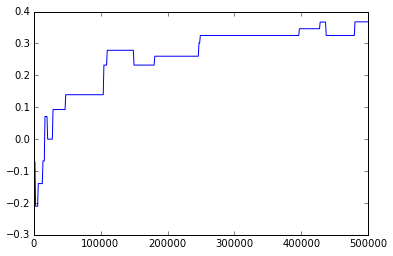

In [39]:
# We plot the mtr w.r.t. IIT against unit's AGI
plt.plot(calc_simple_x.records.c00100, mtr_simple_x)
axes = plt.gca()
axes.set_xlim([0,500000])

Similar to above, we use some hypothetical single taxpayer with no kid to get another MTR plot. 

In [40]:
records_simple_x = Records('../../simple_payer_single.csv', consider_imputations=False, start_year=2016)
params_simple_x = Policy()
params_simple_x.set_year(2016)
calc_simple_x = Calculator(params_simple_x, records_simple_x, sync_years=False)
assert calc_simple_x.current_year == 2016
calc_simple_x.calc_all()

In [41]:
a,mtr_simple_x,c = calc_simple_x.mtr()

(0, 500000)

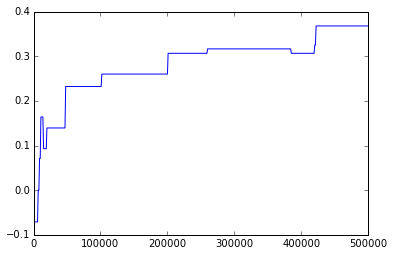

In [42]:
plt.plot(calc_simple_x.records.c00100, mtr_simple_x)
axes = plt.gca()
axes.set_xlim([0,500000])

### Customized MTR skyline charts (including units with iit_mtr<=0)
We now define a function that produces various MTR charts.

In [52]:
RES_COLUMNS = STATS_COLUMNS + ['e00200'] + ['MARS'] + ['n24']
# The results function selects the data frame we'll be using 
def results(c):
    outputs = []
    for col in RES_COLUMNS:
        if hasattr(c.policy, col):
            outputs.append(getattr(c.policy, col))
        else:
            outputs.append(getattr(c.records, col))
    return DataFrame(data=np.column_stack(outputs), columns=RES_COLUMNS)

# EPSILON is defined here to avoid division by zero
EPSILON = 1e-3

# Calculating the weighted average MTR w.r.t wage
def wage_weighted(agg, col_name):
    return (float((agg[col_name] * agg['s006'] * agg['e00200']).sum())/
            ((agg['s006']*agg['e00200']).sum() + EPSILON))

# Calculating the weighted average MTR
def weighted(agg, col_name):
    return (float((agg[col_name] * agg['s006']).sum())/
            ((agg['s006']).sum() + EPSILON))

# The `add_income_bins` function here defines the x-axis for our plot, where desired bins will be sorted 
def add_income_bins(df, num_bins, tab):
    # First, sort by income_measure
    df.sort(tab, inplace=True)
    # Next, do a cumulative sum by the weights
    df['cumsum_weights'] = np.cumsum(df['s006'].values)
    # Max value of cum sum of weights
    max_ = df['cumsum_weights'].values[-1]
    # Create 100 bins and labels based on this cumulative weight
    bin_edges = [0] + list(np.arange(1, (num_bins+1)) * (max_ / float(num_bins)))
    labels = range(1, (num_bins+1))
    #  Groupby weighted deciles
    df['bins'] = pd.cut(df['cumsum_weights'], bins=bin_edges, labels=labels)
    return df

# The `create_mtr_graph` function allows us to obtain various plots, depending our interests. We could choose from different filing group,
# different tab (MTR to plot against), different number of kids (upper bound and lower bound) of the filer and different kind of MTR. 
# Notice that the function always requires two calculators as input. And when they are the same, only one chart will be generated. 
# MARS group, weights and tab need to be specified as well when naming the function. 
# The default setting puts no restriction on the number of kids, and uses combined MTR. 
def create_mtr_graph(calcX, calcY, MARS, weights, tab, kids_less_or_equal=1000, kids_greater_or_equal = 0, combined_or_IIT = 'combined'):
    a, mtr_iit_x, mtr_combined_x = calcX.mtr()
    a, mtr_iit_y, mtr_combined_y = calcY.mtr()
    df_x = results(calcX)
    df_y = results(calcY)
    df_x['mtr_iit'] = mtr_iit_x
    df_y['mtr_iit'] = mtr_iit_y
    df_x['mtr_combined'] = mtr_combined_x
    df_y['mtr_combined'] = mtr_combined_y
    
    
    df_y[tab] = df_x[tab]
    
    df_x = add_income_bins(df_x, 100, tab)
    df_y = add_income_bins(df_y, 100, tab)
    
    df_filtered_x = df_x[ (df_x['MARS']==MARS) & (df_x['n24'] >= kids_greater_or_equal) & (df_x['n24'] <= kids_less_or_equal) ].copy()
    df_filtered_y = df_y[ (df_y['MARS']==MARS) & (df_x['n24'] >= kids_greater_or_equal) & (df_x['n24'] <= kids_less_or_equal) ].copy()
    
    #Create a GroupBy object with 100 groups
    gp_x = df_filtered_x.groupby('bins', as_index=False)
    gp_y = df_filtered_y.groupby('bins', as_index=False)
    
    #Create a series of size 100
    if combined_or_IIT == 'combined':
        wmtr_x = gp_x.apply(weights, 'mtr_combined')
        wmtr_y = gp_y.apply(weights, 'mtr_combined')
    elif combined_or_IIT == 'IIT':
        wmtr_x = gp_x.apply(weights, 'mtr_iit')
        wmtr_y = gp_y.apply(weights, 'mtr_iit')

    #Create a DataFrame out of this with a default index
    wmtrx_df = DataFrame( data=wmtr_x, columns=['w_mtr'])
    wmtry_df = DataFrame( data=wmtr_y, columns=['w_mtr'])

    #Add the bin labels
    wmtrx_df['bins'] = np.arange(1,101)
    wmtry_df['bins'] = np.arange(1,101)

    #Join df_x and appld on the bin, carrying along 'w_mtr'
    #Left join means that 'rslt' is of size len(df_filtered_x)
    rsltx = pd.merge(df_filtered_x[['bins']], wmtrx_df, how='left')
    rslty = pd.merge(df_filtered_y[['bins']], wmtry_df, how='left')

    # Put that column in df_filtered_x, disregarding index of rslt
    df_filtered_x['w_mtr'] = rsltx['w_mtr'].values
    df_filtered_y['w_mtr'] = rslty['w_mtr'].values
    
    df_filtered_x.drop_duplicates(subset = 'bins', inplace = True)
    df_filtered_y.drop_duplicates(subset = 'bins', inplace = True)
    
    plt.plot(df_filtered_x.bins, df_filtered_x.w_mtr)
    if calcX != calcY:
        plt.plot(df_filtered_y.bins.unique(), df_filtered_y.w_mtr.unique())
        plt.legend(['Baseline', 'Reform'])

##### Cobimed MTR for single filers, with no kid, on real data

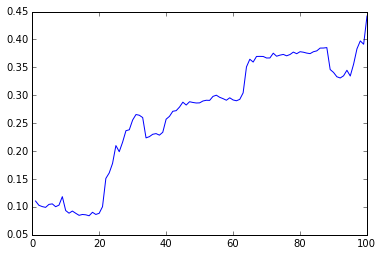

In [44]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 1, weights = weighted, tab = 'c00100', kids_less_or_equal=0)

##### Cobimed MTR for joint filers, with 1 kid or more, on real data

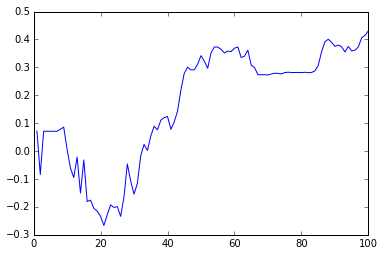

In [45]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 2, weights = weighted, tab = 'c00100', kids_greater_or_equal=1)

##### Combined MTR for single filers on real data, first reform vs baseline

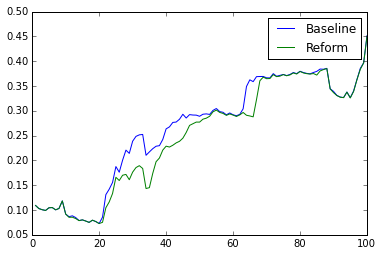

In [46]:
create_mtr_graph(calc_x, calc_y_std, MARS = 1, weights = weighted, tab = 'c00100')

##### Combined MTR for joint filers on real data, first reform vs baseline

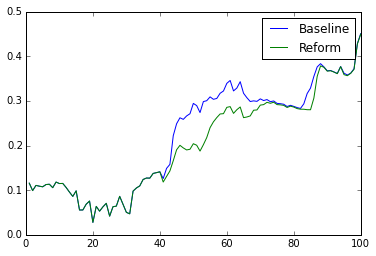

In [47]:
create_mtr_graph(calc_x, calc_y_std, MARS=2,  weights = weighted, tab = 'c00100')

##### Combined MTR for single filers on real data, second reform vs baseline

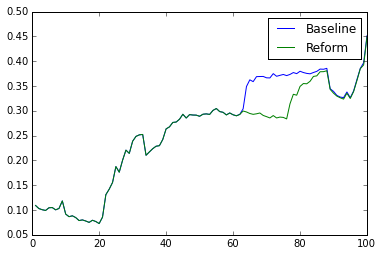

In [48]:
create_mtr_graph(calc_x, calc_y_rates, MARS=1,  weights = weighted, tab = 'c00100')

##### Combined MTR for joint filers on real data, second reform vs baseline

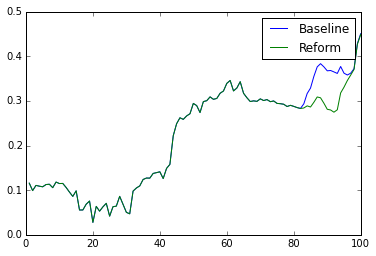

In [49]:
create_mtr_graph(calc_x, calc_y_rates, MARS=2,  weights = weighted, tab = 'c00100')

##### Combined MTR for single filers on real data, third reform vs baseline

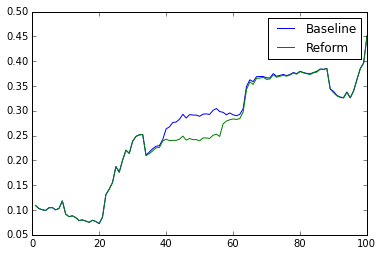

In [50]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=1, weights = weighted, tab = 'c00100')

##### Combined MTR for joint filers on real data, third reform vs baseline

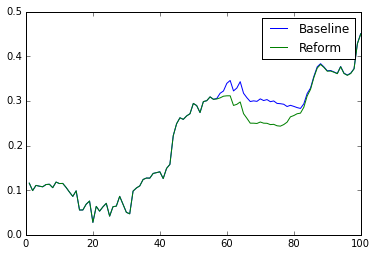

In [51]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=2, weights = weighted, tab = 'c00100')

# Appendix

### MTR Skyline single taxpayer w 1 kid, combined, no AMT

In [47]:
records_simple_x = Records('../../simple_payer.csv')
params_simple_x = Policy()

records_simple_std = Records('../../simple_payer.csv')
params_simple_std = Policy()

reform_simple_x = {
    2016: {
            '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
    },
}


reform_simple_std = {
    2016: {
            '_STD': [[12600, 25200, 12600, 18600, 25300, 12600, 2100]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
           },}

params_simple_x.implement_reform(reform_simple_x)
calc_simple_x = Calculator(params_simple_x, records_simple_x)
for i in range(4):
    calc_simple_x.increment_year()
assert calc_simple_x.current_year == 2017
calc_simple_x.calc_all()

params_simple_std.implement_reform(reform_simple_std)
calc_simple_std = Calculator(params_simple_std, records_simple_std)
for i in range(4):
    calc_simple_std.increment_year()
assert calc_simple_std.current_year == 2017
calc_simple_std.calc_all()

You loaded data for 2009.
Your data have been extrapolated to 2013.
You loaded data for 2009.
Your data have been extrapolated to 2013.


In [48]:
a,b,mtr_simple_x = calc_simple_x.mtr()
a,b,mtr_simple_std = calc_simple_std.mtr()

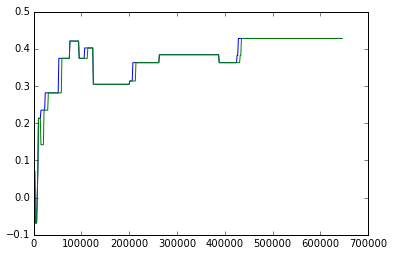

In [49]:
plt.plot(calc_simple_x.records.e00200, mtr_simple_x)
plt.plot(calc_simple_std.records.e00200, mtr_simple_std)

In [ ]:
def create_pct_diff_graph(calcX, calcY1, calcY2, calcY3, MARS, weights, tab):
    a, mtr_iit_x, mtr_combined_x = calcX.mtr()
    a, mtr_iit_y1, mtr_combined_y1 = calcY1.mtr()
    a, mtr_iit_y2, mtr_combined_y2 = calcY2.mtr()
    a, mtr_iit_y3, mtr_combined_y3 = calcY3.mtr()
    df_x = results(calcX)
    df_y1 = results(calcY1)
    df_y2 = results(calcY2)
    df_y3 = results(calcY3)
    df_y1['pct_diff_atr'] = ((1 - mtr_combined_y1) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y2['pct_diff_atr'] = ((1 - mtr_combined_y2) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y3['pct_diff_atr'] = ((1 - mtr_combined_y3) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y1[tab] = df_x[tab]
    df_y2[tab] = df_x[tab]
    df_y3[tab] = df_x[tab]
    df_y1 = add_income_bins(df_y1, 100, tab)
    df_y2 = add_income_bins(df_y2, 100, tab)
    df_y3 = add_income_bins(df_y3, 100, tab)
    
    df_filtered_y1 = df_y1[ (df_y1['MARS']==MARS) ].copy()
    df_filtered_y2 = df_y2[ (df_y2['MARS']==MARS) ].copy()
    df_filtered_y3 = df_y3[ (df_y3['MARS']==MARS) ].copy()
    
    #Create a GroupBy object with 100 groups
    gp_y1 = df_filtered_y1.groupby('bins', as_index=False)
    gp_y2 = df_filtered_y2.groupby('bins', as_index=False)
    gp_y3 = df_filtered_y3.groupby('bins', as_index=False)
    
    #Create a series of size 100
    wpdm_y1 = gp_y1.apply(weights, 'pct_diff_atr')
    wpdm_y2 = gp_y2.apply(weights, 'pct_diff_atr')
    wpdm_y3 = gp_y3.apply(weights, 'pct_diff_atr')

    
    #Create a DataFrame out of this with a default index
    wpdmy1_df = DataFrame( data=wpdm_y1, columns=['w_pdm'])
    wpdmy2_df = DataFrame( data=wpdm_y2, columns=['w_pdm'])
    wpdmy3_df = DataFrame( data=wpdm_y3, columns=['w_pdm'])
    
    #Add the bin labels
    wpdmy1_df['bins'] = np.arange(1,101)
    wpdmy2_df['bins'] = np.arange(1,101)
    wpdmy3_df['bins'] = np.arange(1,101)

    #Join df_x and appld on the bin, carrying along 'w_mtr'
    #Left join means that 'rslt' is of size len(df_filtered_x)
    rslty1 = pd.merge(df_filtered_y1[['bins']], wpdmy1_df, how='left')
    rslty2 = pd.merge(df_filtered_y2[['bins']], wpdmy2_df, how='left')
    rslty3 = pd.merge(df_filtered_y3[['bins']], wpdmy3_df, how='left')

    # Put that column in df_filtered_x, disregarding index of rslt
    df_filtered_y1['w_pdm'] = rslty1['w_pdm'].values
    df_filtered_y2['w_pdm'] = rslty2['w_pdm'].values
    df_filtered_y3['w_pdm'] = rslty3['w_pdm'].values

    df_filtered_y1 = df_filtered_y1[['bins', 'w_pdm']]
    df_filtered_y2 = df_filtered_y2[['bins', 'w_pdm']]
    df_filtered_y3 = df_filtered_y3[['bins', 'w_pdm']]
    
    
    df_filtered_y1.drop_duplicates(inplace=True)
    df_filtered_y2.drop_duplicates(inplace=True)
    df_filtered_y3.drop_duplicates(inplace=True)
    
    plt.plot(df_filtered_y1.bins.unique(), df_filtered_y1.w_pdm)
    plt.plot(df_filtered_y2.bins.unique(), df_filtered_y2.w_pdm)
    plt.plot(df_filtered_y3.bins.unique(), df_filtered_y3.w_pdm)
    plt.legend(['Std_ded','15_rt', '10_rt'], bbox_to_anchor=(.5, .9),
           bbox_transform=plt.gcf().transFigure)

### PCT Diff ATR Chart, IIT + FICA

//anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


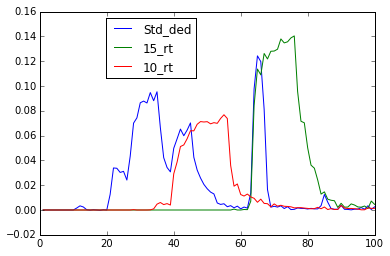

In [67]:
create_pct_diff_graph(calc_x, calc_y_std, calc_y_rates, calc_y_rates_low, MARS=1, weights= weighted, tab = 'c00100')

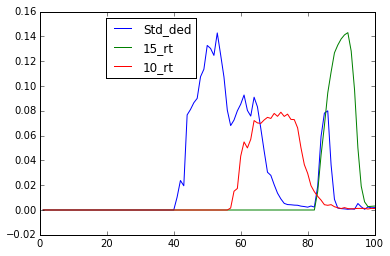

In [68]:
create_pct_diff_graph(calc_x, calc_y_std, calc_y_rates, calc_y_rates_low, MARS=2, weights= weighted, tab = 'c00100')

### percentiles of AGI, including dependents. Note that we are including negatives and nonfilers

In [69]:
def tab_income(calc, tab): 
    df = results(calc)
    df = add_income_bins(df, 100, tab)
    gp = df.groupby('bins', as_index=False)
    wdf = gp.apply(weighted, 'c00100')
    print_full(wdf[:])

In [70]:
tab_income(calc_x, tab = 'c00100')

0      -71458.215608
1        -103.410084
2           0.000000
3           0.000000
4           0.000000
5           0.000000
6           0.000000
7           0.375980
8          40.307963
9         358.203002
10        885.928215
11       1432.609847
12       1954.148117
13       2462.200486
14       2986.962268
15       3516.111535
16       4045.059835
17       4546.708184
18       5078.700723
19       5660.709934
20       6293.881682
21       6910.410790
22       7576.822465
23       8266.770465
24       8960.608168
25       9648.300116
26      10450.916444
27      11201.529627
28      11947.265344
29      12747.848932
30      13469.023343
31      14134.452146
32      14824.267609
33      15532.565009
34      16225.823801
35      16921.511638
36      17657.797719
37      18420.967008
38      19215.006331
39      20069.963360
40      20994.889428
41      21962.647420
42      23010.899241
43      24119.440253
44      25233.404580
45      26351.999013
46      27281.442048
47      28257

### percentiles of AGI, excluding dependents. Note that we are including negatives and nonfilers

In [71]:
RES_COLUMNS = STATS_COLUMNS + ['DSI']
def tab_income_noDep(calc, tab):
    df = results(calc)
    df = df[df.DSI!=1]
    df = add_income_bins(df, 100, tab)
    gp = df.groupby('bins', as_index=False)
    wdf = gp.apply(weighted, 'c00100')
    print_full(wdf[:])

In [72]:
tab_income_noDep(calc_x, tab = 'c00100')

0      -75493.311477
1         -13.601553
2           0.000000
3           0.000000
4           0.000000
5           0.000000
6           0.000000
7           0.066189
8          20.741202
9         292.806951
10        952.288902
11       1703.128942
12       2435.433858
13       3166.842058
14       3883.291705
15       4591.028876
16       5299.537191
17       6057.063670
18       6825.980809
19       7626.393382
20       8433.796585
21       9215.559422
22      10032.338324
23      10836.625949
24      11606.102110
25      12384.982192
26      13179.899079
27      13861.304084
28      14547.235029
29      15246.514287
30      15948.208042
31      16630.269735
32      17337.061768
33      18078.041321
34      18838.269286
35      19642.161988
36      20510.038800
37      21437.328059
38      22394.175736
39      23445.630855
40      24494.856035
41      25595.821126
42      26586.328506
43      27485.707088
44      28404.387727
45      29329.491098
46      30318.810660
47      31367